# Donkey Car Training using Google Colab

Train your donkey car model using accelerated GPU for FREE on Google Colab

## Install TensorFlow 1.13.1 GPU versions


In [0]:
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 47kB/s 
     |████████████████████████████████| 368kB 43.0MB/s 
     |████████████████████████████████| 3.2MB 28.3MB/s 
ERROR: tensorflow 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0


## Check GPU allocation
If "Found GPU at: / device: GPU: 0" is displayed, the GPU is ready to use.

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Git Clone the donkey repository

In [0]:
!git clone https://github.com/autorope/donkeycar.git donkey

Cloning into 'donkey'...
remote: Enumerating objects: 10438, done.
remote: Total 10438 (delta 0), reused 0 (delta 0), pack-reused 10438
Receiving objects: 100% (10438/10438), 58.61 MiB | 11.70 MiB/s, done.
Resolving deltas: 100% (6463/6463), done.


## Install donkey car

In [0]:
!pip3 install -e donkey

Obtaining file:///content/donkey
     |████████████████████████████████| 92kB 3.3MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.4.0-cp36-none-any.whl size=48333 sha256=7fd62876d4593d05df97210e011b71c8e4d7c09f073bce21b81376895cae8a11
  Stored in directory: /root/.cache/pip/wheels/82/e5/de/d90d0f397648a1b58ffeea1b5742ac8c77f71fd43b550fa5a5
Successfully built paho-mqtt
  Running setup.py develop for donkeycar


## Create Project

In [0]:
!donkey createcar --path /content/mycar

using donkey v3.1.0 ...
Creating car folder: /content/mycar
making dir  /content/mycar
Creating data & model folders.
making dir  /content/mycar/models
making dir  /content/mycar/data
making dir  /content/mycar/logs
Copying car application template: complete
Copying car config defaults. Adjust these before starting your car.
Copying train script. Adjust these before starting your car.
Copying my car config overrides
Donkey setup complete.


## Prepare Data
### Copy the following code and run on pi


```bash
cd ~/mycar
tar -czf data.tar.gz data

```

This will create a data.tar.gz file under ~/mycar/data

## Upload Data

### Option 1 - Upload directly to colab

Upload directly to colab could be quite slow. See other options below for faster upload methods.

#### Copy the data.tar.gz to your local pc

Run this on your local pc if you are using linux/mac
```
sftp pi@raspberry.local
cd ~/mycar/data
get data.tar.gz
```

If you are on a windows, download sftp utility like [filezilla](https://filezilla-project.org/) or [putty](https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html)

#### Upload to Colab

In [0]:
import os
from google.colab import files

if(os.path.exists("/content/data.tar.gz")):
   os.remove("/content/data.tar.gz")
   !rm -rf /content/mycar/data

uploaded = files.upload()

WORK_FOLDER = "/content/mycar/data/"
if(os.path.exists(WORK_FOLDER) == False):
  os.makedirs(WORK_FOLDER)

!mv /content/data.tar.gz /content/mycar
%cd /content/mycar/data/
!tar -xzf data.tar.gz

Saving data.zip to data.zip


KeyboardInterrupt: ignored

### Option 2 - Upload to Google Drive

Alternatively, you could first upload the data.tar.gz to Google Drive. We will then mount Google Drive from colab and copy the data from Drive directly. When you run the cell below, you will need to click the link and generate an authorization code to for colab to access your drive.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Suppose you upload the data.tar.gz to Google Drive/mycar/data.tar.gz, this is how you copy it from Google Drive to colab

In [0]:
%cd /content/mycar
!cp /content/drive/My\ Drive/mycar/data.tar.gz .

/content/mycar


And untar it to the right place

In [0]:
!tar -xzf data.tar.gz

Check whether the data is there

In [0]:
!ls data

tub_424_19-07-10


## Train your model

In [0]:
!python /content/mycar/manage.py train --type linear --model /content/mycar/models/mypilot.h5

Check if the model is generated



In [0]:
!ls models

mypilot.h5  mypilot.h5_loss_acc_0.086745.png


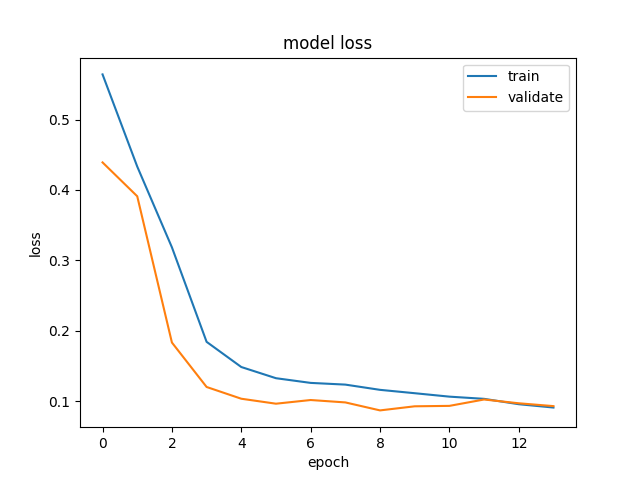

In [0]:
from IPython.display import Image
Image('models/mypilot.h5_loss_acc_0.086745.png')

## Copy trained model back to Donkey Car (Pi)

1. Once the training is complete on colab, download the model file under /content/mycar/models/ folder location.  You can use the file tab on the left hand side to find the model and right click to download it.

![alt text](https://raw.githubusercontent.com/robocarstore/donkey-car-training-on-google-colab/master/images/screen_colab_download_model.png)

2. Copy the file from your PC or Mac to the Raspberry Pi using Filezilla or scp command.

Alternatively, you can copy the model back to Google Drive too

In [0]:
!cp /content/mycar/models/mypilot.h5 /content/drive/My\ Drive/mycar/models

## Start Autopilot on Pi


```bash
cd ~/mycar
python manage.py drive --model models/mypilot.h5 --js
```
